In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# 뉴스 감정 데이터 read
dataset = pd.read_csv('../data/naver_news_crawling_data_with_sentiment.csv', header=0)

# 'timestamp' 컬럼을 datetime 형식으로 변환
dataset['pub_date'] = pd.to_datetime(dataset['pub_date'], errors='coerce')

# 2024-11-03 데이터 제거
dataset = dataset[dataset['pub_date'].dt.date != pd.to_datetime('2024-11-03').date()]

# 'timestamp' 컬럼을 기준으로 시간만 추출하여 새로운 'hour' 컬럼 생성
dataset['hour'] = dataset['pub_date'].dt.strftime('%Y-%m-%d %H:%M')  # 시간 단위로 묶기

# 감정 레이블 점수 매핑 (0: -1, 1: 0, 2: 1)
emotion_mapping = {0: -1, 1: 0, 2: 1}

# 감정 레이블을 점수로 변환
dataset['sentiment_score'] = dataset['sentiment'].map(emotion_mapping)

# 시간별로 감정 점수 합산
emotion_scores = dataset.groupby('hour')['sentiment_score'].sum()

# 결과를 CSV로 저장
emotion_scores.to_csv('../data/sentiment_scores_by_hour.csv')

# 확인
print(emotion_scores.head())

hour
2024-11-04 00:00     0
2024-11-04 03:00    -2
2024-11-04 05:00     0
2024-11-04 06:00   -14
2024-11-04 07:00    -7
Name: sentiment_score, dtype: int64


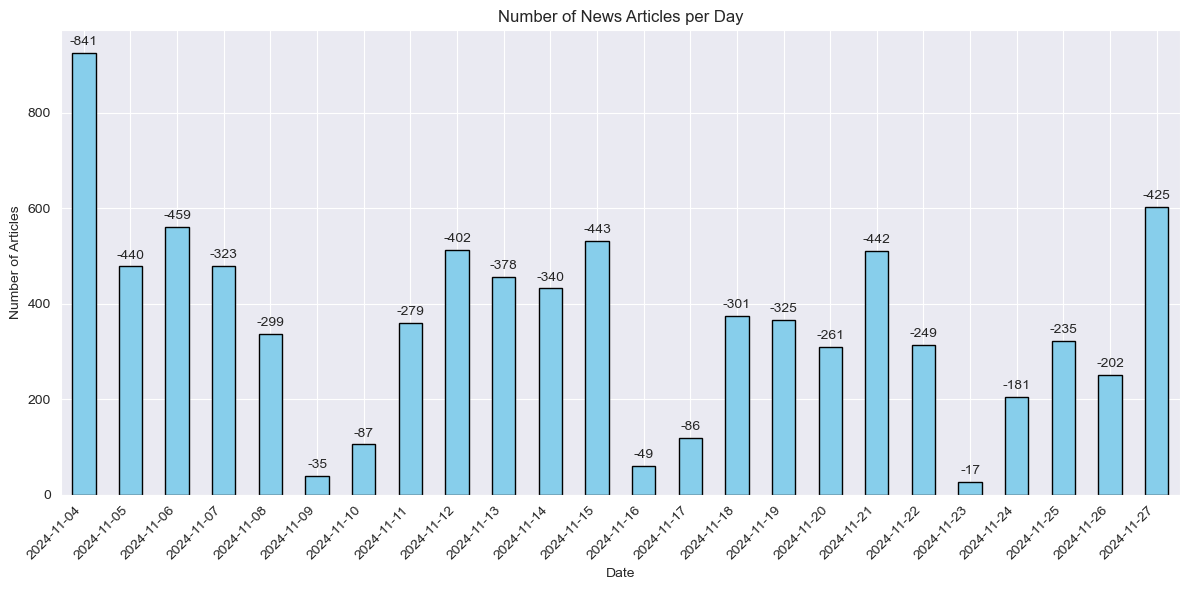

In [19]:
# 'pub_date' 컬럼을 기준으로 날짜만 추출하여 새로운 'date' 컬럼 생성
dataset['date'] = dataset['pub_date'].dt.date  # 날짜만 추출 (시간 제외)

# 각 날짜별 데이터 수 계산
daily_data_count = dataset.groupby('date').size()

# 각 날짜별 감정 점수 합산
daily_sentiment_scores = dataset.groupby('date')['sentiment_score'].sum()

# 시각화
plt.figure(figsize=(12, 6))
daily_data_count.plot(kind='bar', color='skyblue', edgecolor='black')

# 각 막대 위에 sentiment_score 표시
for i, value in enumerate(daily_sentiment_scores):
    plt.text(i, daily_data_count.iloc[i] + 10, f'{value}', ha='center', va='bottom', fontsize=10)

plt.title('Number of News Articles per Day')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45, ha='right')  # 날짜 레이블을 45도 회전하여 보기 좋게 함
plt.tight_layout()
plt.show()